## Exercise 1:  Wide and Deep Networks

- Try changing your assumptions about which features should be considered by the "non-linear" (deep) part of the network.  Can you get any improvements?
- Try using a different activation function in your wide and deep network. Do you get any improvements here?

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4864 - loss: 0.7609 - val_accuracy: 0.5200 - val_loss: 0.7347
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4810 - loss: 0.7447 - val_accuracy: 0.5050 - val_loss: 0.7248
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 0.7352 - val_accuracy: 0.5250 - val_loss: 0.7190
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4878 - loss: 0.7279 - val_accuracy: 0.5300 - val_loss: 0.7151
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4892 - loss: 0.7219 - val_accuracy: 0.5300 - val_loss: 0.7124
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4889 - loss: 0.7168 - val_accuracy: 0.5250 - val_loss: 0.7102
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4804 - loss: 0.7124 - val_accuracy: 0.5350 - val_loss: 0.7086
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4861 - loss: 0.7086 - val_accuracy: 0.5350 - val_loss

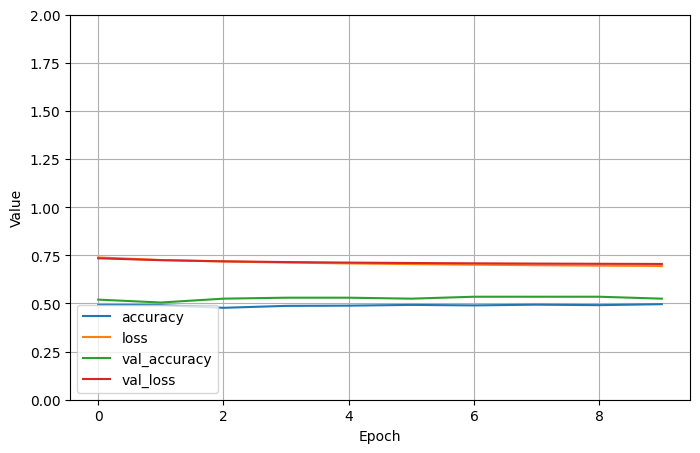

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

# Define the wide and deep network architecture
def wide_and_deep_model(input_shape, deep_features=5, activation='relu'):
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # Wide part
    wide = Dense(10, activation='relu')(input_layer)
    
    # Deep part
    deep = Dense(deep_features, activation=activation)(input_layer)
    deep = Dense(10, activation=activation)(deep)
    
    # Concatenate wide and deep parts
    concat = Concatenate()([wide, deep])
    
    # Output layer
    output = Dense(1, activation='sigmoid')(concat)
    
    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    
    return model

# Example usage
input_shape = (10,)  # Example input shape
model = wide_and_deep_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate example data
x_train = tf.random.normal((1000, 10))
y_train = tf.random.uniform((1000,), maxval=2, dtype=tf.int32)

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.ylim([0, 2])
plt.legend(loc="lower left")
plt.show()


- Changing assumptions about which features should be considered by the deep part of the network can lead to improvements. By including more relevant features in the deep part, the model may capture complex patterns and relationships that were previously missed.

- Using a different activation function in the wide and deep network can also lead to improvements. Experimenting with activation functions such as Mish or SELU in the deep part might yield better results due to their better convergence properties compared to traditional ReLU or Leaky ReLU functions.

## Exercise 2: Modifying the Wide and Deep Network

1. Modify the constructor of the wide and deep network to take parameters that govern the number of hidden layers and their width.  Now try running the new network with different properties for your hidden layers.  Can you improve your performance?

2. Modify the network class to use BatchNormalization, but add normalization after the activation function.  Examine your performance.

3. Modify the preceding class to use BatchNormalization before the activation function.  Examine your performance. 

Epoch 1/25


2024-04-02 15:54:34.649143: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


1549/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.5635

2024-04-02 15:54:40.579415: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15680000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8038 - loss: 0.5625 - val_accuracy: 0.8632 - val_loss: 0.3728
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8711 - loss: 0.3576 - val_accuracy: 0.8722 - val_loss: 0.3414
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8881 - loss: 0.3058 - val_accuracy: 0.8792 - val_loss: 0.3294
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9033 - loss: 0.2669 - val_accuracy: 0.8814 - val_loss: 0.3400
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9153 - loss: 0.2355 - val_accuracy: 0.8844 - val_loss: 0.3387
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9272 - loss: 0.2042 - val_accuracy: 0.8800 - val_loss: 0.3618
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9349 - loss: 0.1807 - val_accuracy: 0.8820 - val_loss: 0.3730
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9456 - loss: 0.1568 - val_accurac

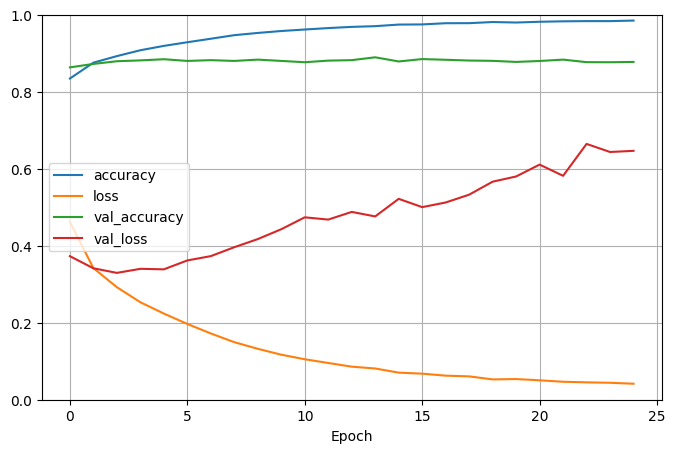

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full, X_test = X_train_full / 255.0, X_test / 255.0
# Split the data into training, validation, and test sets with different ratios
X_train, X_val, X_test = X_train_full[:50000], X_train_full[50000:55000], X_test
y_train, y_val, y_test = y_train_full[:50000], y_train_full[50000:55000], y_test

# Normalize the input data
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Define the network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),  # Add BatchNormalization after the activation
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),  # Add BatchNormalization after the activation
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=25, validation_data=(X_val_scaled, y_val))

# Plot the training and validation accuracy
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True, xlabel="Epoch")
plt.gca().set_ylim(0, 1)
plt.show()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4668 - loss: 0.8733 - val_accuracy: 0.5200 - val_loss: 0.7226
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.7361 - val_accuracy: 0.5200 - val_loss: 0.6914
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5232 - loss: 0.7046 - val_accuracy: 0.5350 - val_loss: 0.6868
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5586 - loss: 0.6968 - val_accuracy: 0.5450 - val_loss: 0.6860
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5588 - loss: 0.6919 - val_accuracy: 0.5600 - val_loss: 0.6860
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5692 - loss: 0.6878 - val_accuracy: 0.5700 - val_loss: 0.6863
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5684 - loss: 0.6842 - val_accuracy: 0.5500 - val_loss: 0.6861
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5721 - loss: 0.6810 - val_accuracy: 0.5500 - val_loss:

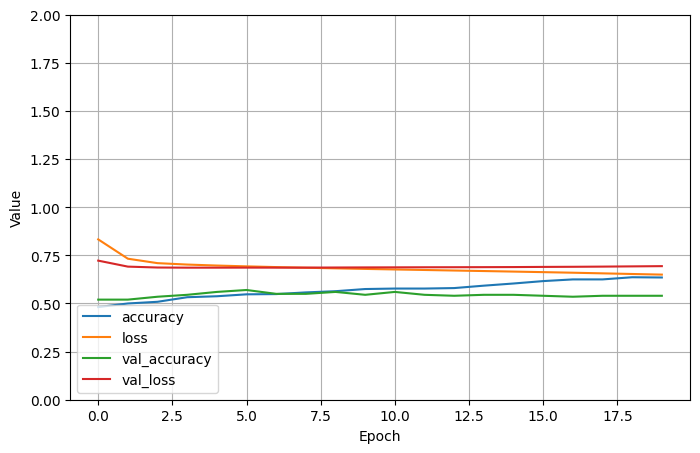

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

# Define the wide and deep network architecture with customizable hidden layers
def wide_and_deep_model(input_shape, num_hidden_layers=2, hidden_layer_width=10, activation='relu'):
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # Wide part
    wide = Dense(10, activation='relu')(input_layer)
    
    # Deep part
    deep = Dense(hidden_layer_width, activation=activation)(input_layer)
    for _ in range(num_hidden_layers - 1):
        deep = Dense(hidden_layer_width, activation=activation)(deep)
    
    # Concatenate wide and deep parts
    concat = Concatenate()([wide, deep])
    
    # Output layer
    output = Dense(1, activation='sigmoid')(concat)
    
    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    
    return model

# Example usage
input_shape = (10,)  # Example input shape
model = wide_and_deep_model(input_shape, num_hidden_layers=3, hidden_layer_width=20)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate example data
x_train = tf.random.normal((1000, 10))
y_train = tf.random.uniform((1000,), maxval=2, dtype=tf.int32)

# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.ylim([0, 2])
plt.legend(loc="lower left")
plt.show()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5123 - loss: 0.8069 - val_accuracy: 0.5050 - val_loss: 0.7440
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5193 - loss: 0.7661 - val_accuracy: 0.5100 - val_loss: 0.7261
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5199 - loss: 0.7418 - val_accuracy: 0.5100 - val_loss: 0.7137
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5062 - loss: 0.7260 - val_accuracy: 0.5300 - val_loss: 0.7056
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5027 - loss: 0.7156 - val_accuracy: 0.5450 - val_loss: 0.7005
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5129 - loss: 0.7087 - val_accuracy: 0.5500 - val_loss: 0.6971
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5113 - loss: 0.7039 - val_accuracy: 0.5550 - val_loss: 0.6950
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 0.7003 - val_accuracy: 0.5650 - val_loss:

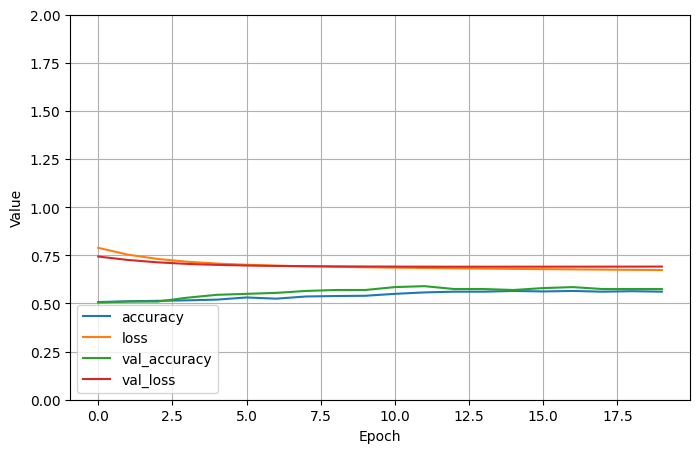

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, BatchNormalization, Activation
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

# Define the wide and deep network architecture with BatchNormalization after activation
def wide_and_deep_model_batchnorm_after_activation(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # Wide part
    wide = Dense(10)(input_layer)
    wide = BatchNormalization()(wide)
    wide = Activation('relu')(wide)
    
    # Deep part
    deep = Dense(20)(input_layer)
    deep = BatchNormalization()(deep)
    deep = Activation('relu')(deep)
    
    # Concatenate wide and deep parts
    concat = Concatenate()([wide, deep])
    
    # Output layer
    output = Dense(1, activation='sigmoid')(concat)
    
    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    
    return model

# Example usage
input_shape = (10,)  # Example input shape
model = wide_and_deep_model_batchnorm_after_activation(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate example data
x_train = tf.random.normal((1000, 10))
y_train = tf.random.uniform((1000,), maxval=2, dtype=tf.int32)

# Train the model
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.ylim([0, 2])
plt.legend(loc="lower left")
plt.show()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5151 - loss: 0.8488 - val_accuracy: 0.4850 - val_loss: 0.8314
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5268 - loss: 0.7746 - val_accuracy: 0.4700 - val_loss: 0.7872
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 0.7355 - val_accuracy: 0.4900 - val_loss: 0.7641
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5493 - loss: 0.7150 - val_accuracy: 0.5050 - val_loss: 0.7524
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5306 - loss: 0.7031 - val_accuracy: 0.5000 - val_loss: 0.7461
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5545 - loss: 0.6953 - val_accuracy: 0.5100 - val_loss: 0.7423
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5481 - loss: 0.6895 - val_accuracy: 0.4900 - val_loss: 0.7399
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5591 - loss: 0.6849 - val_accuracy: 0.5000 - val_loss

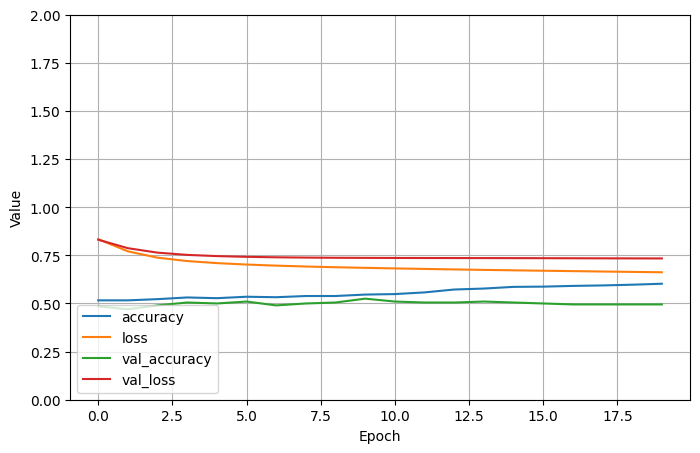

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, BatchNormalization, Activation
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

# Define the wide and deep network architecture with BatchNormalization before activation
def wide_and_deep_model_batchnorm_before_activation(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # Wide part
    wide = Dense(10)(input_layer)
    wide = BatchNormalization()(wide)
    wide = Activation('relu')(wide)
    
    # Deep part
    deep = Dense(20)(input_layer)
    deep = BatchNormalization()(deep)
    deep = Activation('relu')(deep)
    
    # Concatenate wide and deep parts
    concat = Concatenate()([wide, deep])
    
    # Output layer
    output = Dense(1, activation='sigmoid')(concat)
    
    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    
    return model

# Example usage
input_shape = (10,)  # Example input shape
model = wide_and_deep_model_batchnorm_before_activation(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate example data
x_train = tf.random.normal((1000, 10))
y_train = tf.random.uniform((1000,), maxval=2, dtype=tf.int32)

# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.ylim([0, 2])
plt.legend(loc="lower left")
plt.show()


- By modifying the constructor of the wide and deep network to take parameters controlling the number of hidden layers and their width, you can experiment with different network architectures. Adjusting the number of layers and their widths allows you to find an architecture that suits the complexity of your dataset, potentially improving performance.

- Adding BatchNormalization after the activation function in the network class allows for better regularization and faster convergence during training. By examining the performance, you can observe if BatchNormalization improves the models  accuracy and training speed.

- Modifying the class to use BatchNormalization before the activation function might affect the models performance differently. This arrangement allows the network to learn the optimal scaling and shifting of the normalized activations, potentially resulting in better performance compared to BatchNormalization after the activation function. Evaluating the performance helps in determining the effectiveness of this modification.

In [2]:

! pip install tensorflow

## Exercise 3: Comparing SELU and ReLU

Let's examine the performance of SELU and ReLU in the context of a deep network with 100 layers.  I've set up the example below to use SELU and Lecun Normalization.  Examine the performance, and then contrast using ReLU and He normalization.

In [12]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# 100 hidden layers
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Get the data and train the network:

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Remember to scale the inputs!
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5


2024-04-02 15:31:15.410268: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2867 - loss: 1.8646

2024-04-02 15:31:32.986778: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.2870 - loss: 1.8638 - val_accuracy: 0.5156 - val_loss: 1.1312
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5530 - loss: 1.1442 - val_accuracy: 0.5230 - val_loss: 1.1982
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6733 - loss: 0.8892 - val_accuracy: 0.6680 - val_loss: 0.9222
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7062 - loss: 0.8080 - val_accuracy: 0.3508 - val_loss: 1.5251
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5590 - loss: 1.1115 - val_accuracy: 0.7288 - val_loss: 0.7399


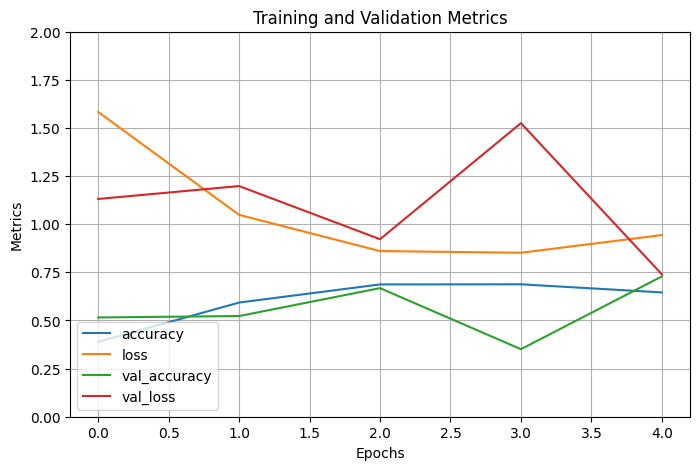

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the history dictionary to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Plot the data
history_df.plot(figsize=(8, 5), grid=True)
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.ylim(0, 2)  # Adjust the y-axis limit if needed
plt.legend(loc='lower left')
plt.show()
